In [1]:
import ExonExonData as eed
import pathlib
cwd = pathlib.Path.cwd()
import pandas
import numpy
import pickle
from Heatmaps import heat_embedding
from Heatmaps import heatmapv2 as heatmap
from Heatmaps import _undigitize_seq as undigit
from Heatmaps import _reorder_frame as reorder_frame

In [2]:
# data_file = cwd.parent / "Data_Files" / "Primates" / "Genetics" / "Homo_sapiens" / "Cleaned_Data" / "Data_Set_2_frame.pkl"
# transform = numpy.log2
transform = None

# data_file = cwd / "TE_Images_ForPaper" / "Dict" / "Seq_For_Images_n100000_minLength12.pkl"
# with open(data_file, "rb") as file:
#     data = pickle.load(file)

# print(data)

k = 6
# colors: list = ['darkred', 'orangered', 'green', 'lime']
colors: list = ['green', 'orange', 'orangered', 'red']
bounds: list = [0, 0.452, 1.45, 2.36, 3.2] # 0.98


In [3]:
def heat_dataset(source_data: pathlib.Path or pandas.DataFrame, length: int = 12, *args, **kwargs) -> pandas.DataFrame:
    '''
    I have lost how I originally created the dataset for the heatmaps, so here's a function for doing that.

    This assumes the data is a pickle or a dataframe.

    Except never mind, the frame data will work nicely. I'm just going to use this to filter down to a nice length for the sequences
    '''
    if isinstance(source_data, pathlib.Path):
        source_data: pandas.DataFrame = pandas.read_pickle(source_data)


    source_data["Length"] = source_data["Seq"].apply(lambda x: len(x))
    source_data = source_data[source_data["Length"] >= length]
    source_data = source_data.reset_index() 

    return source_data



In [4]:
source_data = cwd.parent / "Data_Files" / "Primates" / "Genetics" / "Homo_sapiens" / "Cleaned_Data" / "Data_Set_1_frame.pkl"
source_data = heat_dataset(source_data)
# print(source_data["Classificaion"].unique())
# source_data["Classificaion"] = source_data["Classificaion"].astype(pandas.Categorical)
exon_data = source_data[source_data["Classificaion"] == "exon"]
intron_data = source_data[source_data["Classificaion"] == "intron"]


print(exon_data.shape)
print(intron_data.shape)
# source_data["Length"] = source_data[""]
print(source_data.head())

(28255, 5)
(26074, 5)
   index        NCIBName Classificaion  \
0      0  NM_001375617.1          exon   
1      1  NM_001375617.1          exon   
2      2  NM_001375617.1          exon   
3      3  NM_001375617.1          exon   
4      4  NM_001375617.1          exon   

                                                 Seq  Length  
0                              GTCAGTGTGGAGGAGACTGAG      21  
1  TATTCTACCTTGTAAATACTGTTATTTGTATATACTGTAAATGATG...     130  
2  GCCACTGCAGAACAAATTAGACTTGCACAGATGATTTCGGACCATA...      78  
3  TTGATTGATATTACAGGCAAGAACCAGGATGAATGTGTGATTGCTT...     111  
4  CATTCCTGGGAGATGGTCGGGAAGAAGAAGGGAGTCTCAGGCCAGA...     202  


Creates the heat embedding dictionaries.

In [5]:
_, exon, intron, _, _, exon_max, exon_min, intron_max, intron_min = heat_embedding(source_data,
                                                                                    # n = n,
                                                                                    # k_m = k, k_p = k,
                                                                                    just_import = True,
                                                                                    log_transform = transform)  # Just import is turned on because I have one dictionary with all the data. I'll use that one set for all the images from now on. Just makes things a little faster and easier.


Saving them for later even though I'm going to use the info out of the previous function to generate the heatmaps and the moments.

In [6]:
exon_frame = reorder_frame(pandas.DataFrame(exon), transpose = True)
intron_frame = reorder_frame(pandas.DataFrame(intron), transpose = True)

dig_labels = list(exon_frame.columns)
# seq_labels = [undigit(dig_seq) for dig_seq in dig_labels]
new_cols = {dig_seq:undigit(dig_seq) for dig_seq in dig_labels}
exon_frame = exon_frame.rename(columns=new_cols, index=new_cols)
intron_frame = intron_frame.rename(columns=new_cols, index=new_cols)

# print(exon_frame)

# with open(cwd / "TE_Images_ForPaper" / "Dict" / "Fixed_Exon_6mer.pkl", "wb") as file:
#     pickle.dump(exon, file)

# with open(cwd / "TE_Images_ForPaper" / "Dict" / "Fixed_Intron_6mer.pkl", "wb") as file:
#     pickle.dump(intron, file)


In [7]:
print(exon_frame)

             AAAAAA      AAAAAG      AAAAAT      AAAAAC      AAAAGA  \
CCCCCC     9.821558    1.964312    3.928623    0.000000    0.000000   
CCCCCT     3.928623    0.000000    9.821558    0.000000    0.000000   
CCCCCG     0.000000    0.000000    1.964312    0.000000    3.928623   
CCCCCA     1.964312    1.964312    0.000000    1.964312    3.928623   
CCCCTC     0.000000    5.892935    0.000000    0.000000    3.928623   
...             ...         ...         ...         ...         ...   
AAAAGA   121.787313   29.464673   45.179165   25.536050   27.500361   
AAAAAC   514.649615   21.607427   33.393296   35.357607   17.678804   
AAAAAT   390.897990   33.393296   70.715214   31.428984   15.714492   
AAAAAG   212.145643   29.464673   53.036411   41.250542    7.857246   
AAAAAA  5384.177837  569.650337  302.503972  233.753069  261.253430   

            AAAAGG      AAAAGT     AAAAGC     AAAATA     AAAATG  ...  CCCCGT  \
CCCCCC    1.964312    0.000000   0.000000   3.928623   1.964312  ..

In [8]:
print(intron_frame)

              AAAAAA       AAAAAG      AAAAAT      AAAAAC      AAAAGA  \
CCCCCC      0.000000     0.000000    0.000000    0.000000    0.000000   
CCCCCT      1.954305     0.000000   25.894547    0.000000    0.000000   
CCCCCG      0.000000     0.000000    4.397187    0.000000    8.305798   
CCCCCA      2.931458     0.000000    0.000000    0.000000    0.000000   
CCCCTC      0.000000     7.328645    0.000000    0.000000    0.000000   
...              ...          ...         ...         ...         ...   
AAAAGA    245.265336    47.880484   96.738120    9.771527   32.734616   
AAAAAC    707.947154    51.789095   26.871700   33.711769   42.506144   
AAAAAT    820.808294    71.332149  160.741624   21.985936   27.360276   
AAAAAG    414.312758    31.757464   92.829509   99.181002    8.305798   
AAAAAA  10451.137036  1181.866228  388.906787  357.149323  560.397091   

            AAAAGG      AAAAGT      AAAAGC     AAAATA      AAAATG  ...  \
CCCCCC    0.000000    0.000000    0.000000   2.44

In [10]:
exon_frame.to_pickle(cwd / "Dicts_Fixed" / "Exon_6mer.pkl")
intron_frame.to_pickle(cwd / "Dicts_Fixed" / "Intron_6mer.pkl")

Output file to
	d:\Coding\Thesis\FractalDimension\TE_Images_ForPaper\Heatmaps\EA\Fixed_Exon.png
Output file to
	d:\Coding\Thesis\FractalDimension\TE_Images_ForPaper\Heatmaps\EA\Fixed_Intron.png


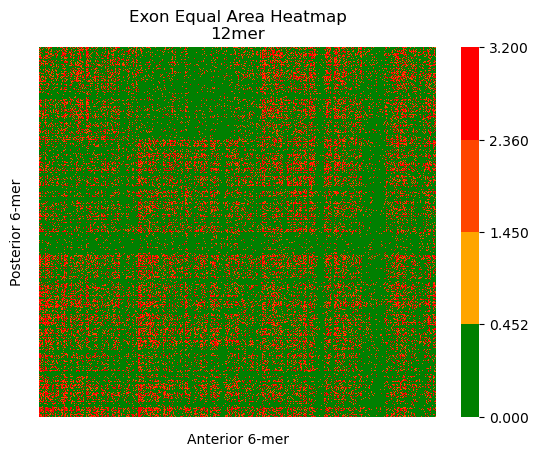

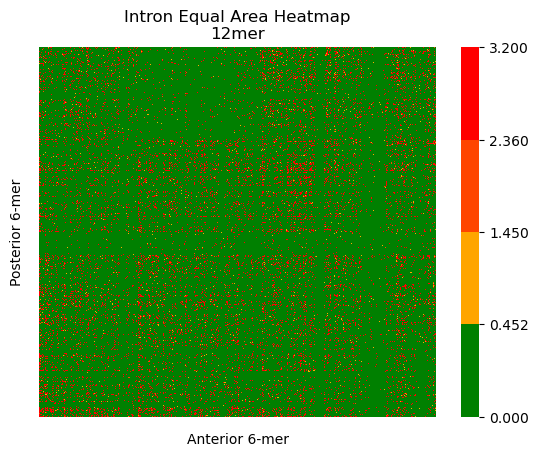

In [10]:
heatmap(exon, colors = colors, bounds = bounds, 
        x_title = f"Anterior {k}-mer", y_title = f"Posterior {k}-mer",
        title = f"Exon Equal Area Heatmap\n{2*k}mer", fileoutput = cwd / "TE_Images_ForPaper" / "Heatmaps" / "EA" / f"Fixed_Exon.png")
heatmap(intron, colors = colors, bounds = bounds, 
        x_title = f"Anterior {k}-mer", y_title = f"Posterior {k}-mer",
        title = f"Intron Equal Area Heatmap\n{2*k}mer", fileoutput = cwd / "TE_Images_ForPaper" / "Heatmaps" / "EA" / f"Fixed_Intron.png")


In [15]:
random_exon = cwd.parent / "Data_Files" / "Random_Exon_Seq.pkl"
random_intron = cwd.parent / "Data_Files" / "Random_Intron_Seq.pkl"
random_ep = cwd.parent / "Data_Files" / "Random_EP_Seq.pkl"

In [12]:
_, ran_exon, *_ = heat_embedding(random_exon,
                                 # n = n,
                                 # k_m = k, k_p = k,
                                 just_import = True,
                                 log_transform = transform)  # Just import is turned on because I have one dictionary with all the data. I'll use that one set for all the images from now on. Just makes things a little faster and easier.


In [18]:
_, _, ran_intron, *_ = heat_embedding(random_intron,
                                      # n = n,
                                      # k_m = k, k_p = k,
                                      just_import = True,
                                      log_transform = transform)  # Just import is turned on because I have one dictionary with all the data. I'll use that one set for all the images from now on. Just makes things a little faster and easier.


In [19]:
_, ranep_exon, ranep_intron, *_ = heat_embedding(random_ep,
                                                 # n = n,
                                                 # k_m = k, k_p = k,
                                                 just_import = True,
                                                 log_transform = transform)  # Just import is turned on because I have one dictionary with all the data. I'll use that one set for all the images from now on. Just makes things a little faster and easier.

In [20]:
random_exon_frame = reorder_frame(pandas.DataFrame(ran_exon), transpose = True)
random_intron_frame = reorder_frame(pandas.DataFrame(ran_intron), transpose = True)
random_ep_exon_frame = reorder_frame(pandas.DataFrame(ranep_exon), transpose = True)
random_ep_intron_frame = reorder_frame(pandas.DataFrame(ranep_intron), transpose = True)

dig_labels = list(random_intron_frame.columns)
# seq_labels = [undigit(dig_seq) for dig_seq in dig_labels]
new_cols = {dig_seq:undigit(dig_seq) for dig_seq in dig_labels}

random_exon_frame = random_exon_frame.rename(columns=new_cols, index=new_cols)
random_intron_frame = random_intron_frame.rename(columns=new_cols, index=new_cols)
random_ep_exon_frame = random_ep_exon_frame.rename(columns=new_cols, index=new_cols)
random_ep_intron_frame = random_ep_intron_frame.rename(columns=new_cols, index=new_cols)

In [21]:
random_exon_frame.to_pickle(cwd / "Dicts_Random" / "Random_Exon_6mer.pkl")
random_intron_frame.to_pickle(cwd / "Dicts_Random" / "Random_Intron_6mer.pkl")
random_ep_exon_frame.to_pickle(cwd / "Dicts_Random" / "Random_EP_Exon_6mer.pkl")
random_ep_intron_frame.to_pickle(cwd / "Dicts_Random" / "Random_EP_Intron_6mer.pkl")

Output file to
	d:\Coding\Thesis\FractalDimension\TE_Images_ForPaper\Heatmaps\Random\Random_Exon.png


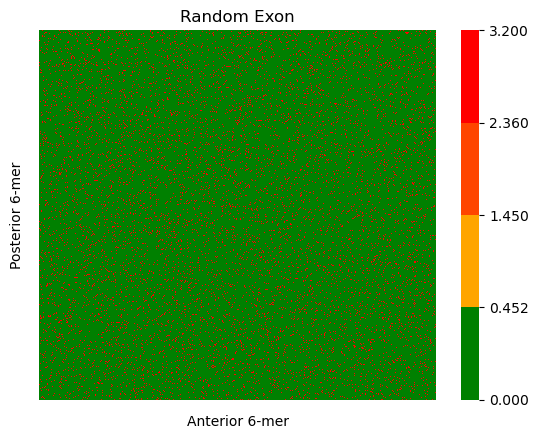

In [22]:
heatmap(random_exon_frame, colors = colors, bounds = bounds, 
        x_title = f"Anterior {k}-mer", y_title = f"Posterior {k}-mer",
        title = f"Random Exon", fileoutput = cwd / "TE_Images_ForPaper" / "Heatmaps" / "Random" / f"Random_Exon.png")

Output file to
	d:\Coding\Thesis\FractalDimension\TE_Images_ForPaper\Heatmaps\Random\Random_Intron.png


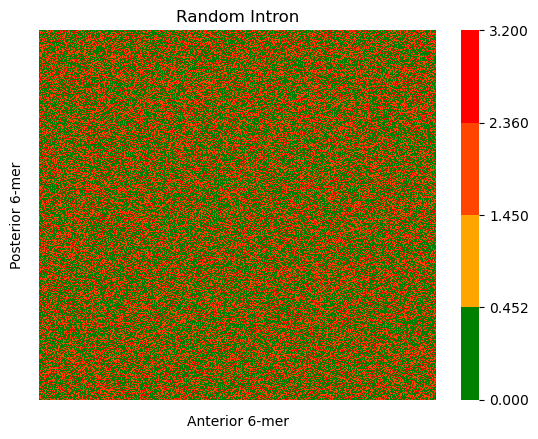

In [23]:
heatmap(random_intron_frame, colors = colors, bounds = bounds, 
        x_title = f"Anterior {k}-mer", y_title = f"Posterior {k}-mer",
        title = f"Random Intron", fileoutput = cwd / "TE_Images_ForPaper" / "Heatmaps" / "Random" / f"Random_Intron.png")

Output file to
	d:\Coding\Thesis\FractalDimension\TE_Images_ForPaper\Heatmaps\Random\Random_EP_Exon.png


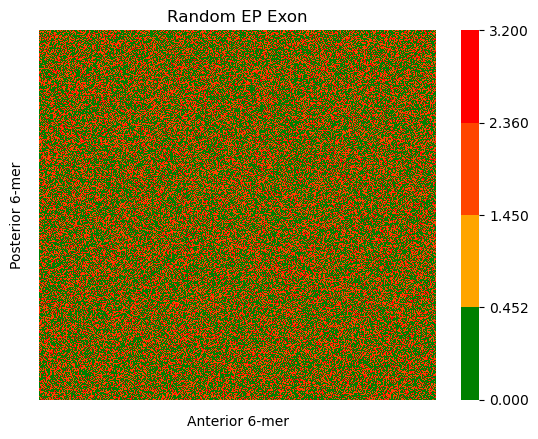

In [24]:
heatmap(random_ep_exon_frame, colors = colors, bounds = bounds, 
        x_title = f"Anterior {k}-mer", y_title = f"Posterior {k}-mer",
        title = f"Random EP Exon", fileoutput = cwd / "TE_Images_ForPaper" / "Heatmaps" / "Random" / f"Random_EP_Exon.png")

Output file to
	d:\Coding\Thesis\FractalDimension\TE_Images_ForPaper\Heatmaps\Random\Random_EP_Intron.png


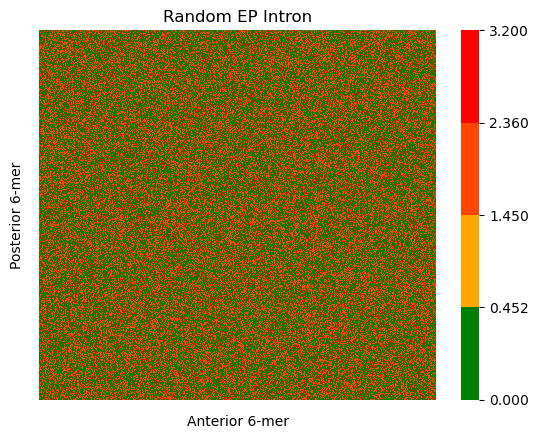

: 

In [25]:
heatmap(random_ep_intron_frame, colors = colors, bounds = bounds, 
        x_title = f"Anterior {k}-mer", y_title = f"Posterior {k}-mer",
        title = f"Random EP Intron", fileoutput = cwd / "TE_Images_ForPaper" / "Heatmaps" / "Random" / f"Random_EP_Intron.png")